# Example of volume calculation

Volume calculation with bottom by reference to plan z = 4
Using breach telemac2d example

In [1]:
from data_manip.computation.volume import volume_calculation
from data_manip.extraction.telemac_file import TelemacFile

# Changing of directory : 'examples' directory of the Telemac sources
import os, sys
HOMETEL = os.environ.get('HOMETEL')

# defining the timestep number of extraction in the mesh file
itime = 0

# defining the name of the mesh file
my_mesh_file = os.path.join(HOMETEL, "examples", "telemac2d", "breach", "geo_breach.slf")

# loading the mesh file in an object TelemacFile
geo = TelemacFile(my_mesh_file)

# extracting connectivity array
ikle = geo.get_mesh_connectivity()

# extracting bottom from the mesh file 
try:
    bottom = geo.get_data_value('BOTTOM', itime)
except:
    bottom = geo.get_data_value('FOND', itime)

# extracting x and y coordinates from the mesh file
coord_x = geo.get_mesh_coord(1)
coord_y = geo.get_mesh_coord(2)

# defining the reference plan (e.g. Z = 4 m) which will be the reference to calculate the volume
zref = 4

# Calculating the volume of bathymetry relatively to plan Z = 4 m
volume_1, surface_point, volume_point = volume_calculation(ikle,
                                                           bottom,
                                                           coord_x,
                                                           coord_y,
                                                           x_ref=zref)

print(str(volume_1) + " m3")

geo.close()

580999.9785807761 m3


# Example of volume calculation 2

Volume of water calculation
Using breach telemac2d example

In [2]:
from data_manip.computation.volume import volume_calculation
from data_manip.extraction.telemac_file import TelemacFile

# Changing of directory : 'examples' directory of the Telemac sources
import os, sys
HOMETEL = os.environ.get('HOMETEL')

# defining the timestep number of extraction in the mesh file
itime = 0

# defining the name of the mesh file
my_mesh_file = os.path.join(HOMETEL, "examples", "telemac2d", "breach", "ini_breach.slf")

# loading the mesh file in an object TelemacFile
geo = TelemacFile(my_mesh_file)

# extracting connectivity array
ikle = geo.get_mesh_connectivity()

# extracting bottom from the mesh file
try:
    bottom = geo.get_data_value('BOTTOM', itime)
except:
    bottom = geo.get_data_value('FOND', itime)

    
# extracting free surface from the mesh file
# To get water depth, operation free surface - bottom is done
try:
    water_depth = geo.get_data_value('FREE SURFACE', itime) - bottom
except:
    water_depth = geo.get_data_value('SURFACE LIBRE', itime) - bottom

# keep only positive water depth (if negative ==> 0)
water_depth[water_depth < 0] = 0    

# extracting x and y coordinates from the mesh file
coord_x = geo.get_mesh_coord(1)
coord_y = geo.get_mesh_coord(2)

# Calculating the volume of water in the mesh
volume_w, surface_point, volume_point = volume_calculation(ikle,
                                                           water_depth,
                                                           coord_x,
                                                           coord_y)


print("Volume of water : " + str(volume_w) + " m3")

geo.close()

Volume of water : 271560.86835175403 m3


# Example of volume calculation 2

Volume calculation between 2 time steps with calculation in api mode

In [3]:
import numpy as np
from mpi4py import MPI

# Changing of directory : 'examples' directory of the Telemac sources
import os
HOMETEL = os.environ.get('HOMETEL')
os.chdir(os.path.join(HOMETEL, "examples", "telemac2d", "breach"))

from data_manip.extraction.telemac_file import TelemacFile
from data_manip.computation.volume import volume_calculation

# Instantiation of a Telemac2d object from the test case named 'breach'
# - steering file : 't2d_breach.cas'
# - language : french (1) or english (2: default)
from telapy.api.t2d import Telemac2d
my_case = Telemac2d('t2d_breach.cas', lang=1, comm=MPI.COMM_SELF)

# Reading case file
my_case.set_case()

# Initialisation of the calculation
my_case.init_state_default()

# Extracting water depth of the model initialisation
water_depth_0 = my_case.get_array('MODEL.WATERDEPTH')

# Extracting x and y coordinates from the model
coord_x = my_case.get_array('MODEL.X')
coord_y = my_case.get_array('MODEL.Y')

# Extracting connectivity array from the model
ikle = my_case.get_array('MODEL.IKLE') - 1
# Transpose of the connectivity array because ikle from Telemac is the transpose of ikle from mesh file
ikle = ikle.T

# Calculating the volume of water at T = 0s
volume_w0, surface_point, volume_point = volume_calculation(ikle,
                                                           water_depth_0,
                                                           coord_x,
                                                           coord_y)

# Execution of the calculation on 101 timesteps
for i in range(101):
    my_case.run_one_time_step()

water_depth_100 = my_case.get_array('MODEL.WATERDEPTH')

volume_w100, surface_point, volume_point = volume_calculation(ikle,
                                                           water_depth_100,
                                                           coord_x,
                                                           coord_y)

print("Volume of water at T = 0 : " + str(volume_w0) + " m3")
print("Volume of water at T = 100 : " + str(volume_w100) + " m3")

my_case.finalize()
del my_case

  ~> Checking keyword/rubrique coherence
 MASTER PROCESSOR NUMBER            0  OF THE GROUP OF            1
 READ_CONFIG: FILE CONFIG NOT FOUND: CONFIG
 DEFAULTS VALUES OF LU AND LNG:            6  AND            2
 LISTING OF TELEMAC2D------------------------------------------------------------------------------

                TTTTT  EEEEE  L      EEEEE  M   M  AAAAA  CCCCC
                  T    E      L      E      MM MM  A   A  C    
                  T    EEE    L      EEE    M M M  AAAAA  C    
                  T    E      L      E      M   M  A   A  C    
                  T    EEEEE  LLLLL  EEEEE  M   M  A   A  CCCCC
                                                               
                        2D    VERSION V8P4   FORTRAN 2003       







                        ~^~^~^~^~^~^~^~^~^~^~^^~^~^~^~^~^~     
                          ~                            ~       
                               \   '    o      '               
                               /\ o

 66.048698425292969     
 LOCATED AT    1.8505645780453817       METRES

 SOURCE POINT           27 PUT ON POINT
   2076.6047363281250       AND    66.048698425292969     
 LOCATED AT    1.8100196929221088       METRES

 SOURCE POINT           28 PUT ON POINT
   2083.2854003906250       AND    64.867202758789062     
 LOCATED AT    2.2093949375886739       METRES

 SOURCE POINT           29 PUT ON POINT
   2083.2854003906250       AND    64.867202758789062     
 LOCATED AT   0.80562003853679232       METRES

 SOURCE POINT           30 PUT ON POINT
   2083.2854003906250       AND    64.867202758789062     
 LOCATED AT    3.8069165074809224       METRES

 SOURCE POINT           31 PUT ON POINT
   2090.3112792968750       AND    62.958999633789062     
 LOCATED AT    2.0529605505461159       METRES

 SOURCE POINT           32 PUT ON POINT
   2090.3112792968750       AND    62.958999633789062     
 LOCATED AT    3.4477487206653392       METRES

 SOURCE POINT           33 PUT ON POINT
   20

D AT    1.2757465906800942       METRES

 SOURCE POINT           20 PUT ON POINT
   2942.0937500000000       AND    13.809900283813477     
 LOCATED AT    1.4603001051041995       METRES

 SOURCE POINT           21 PUT ON POINT
   2939.5895996093750       AND    15.317899703979492     
 LOCATED AT   0.47311801439010920       METRES

 SOURCE POINT           22 PUT ON POINT
   2936.9797363281250       AND    13.829299926757812     
 LOCATED AT    1.1713742515789376       METRES

 SOURCE POINT           23 PUT ON POINT
   2934.4968261718750       AND    15.112899780273438     
 LOCATED AT   0.57796043939740649       METRES

 SOURCE POINT           24 PUT ON POINT
   2929.3850097656250       AND    14.936800003051758     
 LOCATED AT    1.5462823364210914       METRES

 SOURCE POINT           25 PUT ON POINT
   2929.3850097656250       AND    14.936800003051758     
 LOCATED AT    1.4563817005438005       METRES

 SOURCE POINT           26 PUT ON POINT
   2924.3041992187500       AND    14

Volume of water at T = 0 : 271560.86835175403 m3
Volume of water at T = 100 : 270903.5431559253 m3



                     *************************************
                     *    END OF MEMORY ORGANIZATION:    *
                     *************************************




 CORRECT END OF RUN



 ELAPSE TIME : 


                              2  SECONDS


# Evolution of volume during a simulation (breach example)

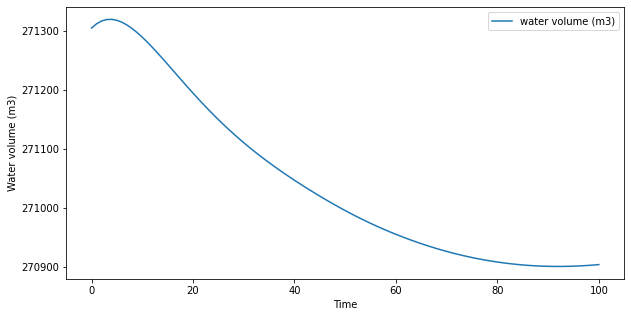

Volume of water at T = 0 : 271560.86835175403 m3
Volume of water at T = 100 : 270903.5431559253 m3



                     *************************************
                     *    END OF MEMORY ORGANIZATION:    *
                     *************************************




 CORRECT END OF RUN





 ELAPSE TIME : 
                             22  SECONDS


In [4]:
import numpy as np
from mpi4py import MPI

from IPython.display import clear_output, display
%matplotlib inline

from matplotlib import pyplot as plt
from postel.plot1d import plot1d


# Changing of directory : 'examples' directory of the Telemac sources
import os
HOMETEL = os.environ.get('HOMETEL')
os.chdir(os.path.join(HOMETEL, "examples", "telemac2d", "breach"))

from data_manip.extraction.telemac_file import TelemacFile
from data_manip.computation.volume import volume_calculation

# Instantiation of a Telemac2d object from the test case named 'breach'
# - steering file : 't2d_breach.cas'
# - language : french (1) or english (2: default)
from telapy.api.t2d import Telemac2d

my_mesh_file = "ini_breach.slf"
geo = TelemacFile(my_mesh_file)
ikle = geo.get_mesh_connectivity()
geo.close()

my_case = Telemac2d('t2d_breach.cas', lang=1, comm=MPI.COMM_SELF)

my_case.set_case()

my_case.init_state_default()

npoints = my_case.get('MODEL.NPOIN')

water_depth_0 = my_case.get_array('MODEL.WATERDEPTH')
coord_x = my_case.get_array('MODEL.X')
coord_y = my_case.get_array('MODEL.Y')


#ikle = my_case.get_array('MODEL.IKLE') - 1

volume_w0, surface_point, volume_point = volume_calculation(ikle,
                                                           water_depth_0,
                                                           coord_x,
                                                           coord_y)

times = []
volume_w = []

#Initialising figure
fig, ax = plt.subplots(figsize=(10,5))
plt.show()

for i in range(101):
    
    my_case.run_one_time_step()
    water_depth = my_case.get_array('MODEL.WATERDEPTH')
    volume, surface_point, volume_point = volume_calculation(ikle,
                                                            water_depth,
                                                            coord_x,
                                                            coord_y)
    times.append(i)
    volume_w.append(volume)
    clear_output(wait=True)
    
    ax.cla()
    plot1d(ax, times, volume_w, 'water volume (m3)', 'T = {}s'.format(times[i]))
    
    # Displaying legend
    ax.legend(loc='upper right')

    ax.set_xlabel('Time')
    ax.set_ylabel('Water volume (m3)')
    
    display(fig)


print("Volume of water at T = 0 : " + str(volume_w0) + " m3")
print("Volume of water at T = 100 : " + str(volume_w[100]) + " m3")

my_case.finalize()
del my_case

# Evolution of volume comparison and plot2d

 MASTER PROCESSOR NUMBER            0  OF THE GROUP OF            1
 READ_CONFIG: FILE CONFIG NOT FOUND: CONFIG
 DEFAULTS VALUES OF LU AND LNG:            6  AND            2
 LISTING OF TELEMAC2D------------------------------------------------------------------------------

                TTTTT  EEEEE  L      EEEEE  M   M  AAAAA  CCCCC
                  T    E      L      E      MM MM  A   A  C    
                  T    EEE    L      EEE    M M M  AAAAA  C    
                  T    E      L      E      M   M  A   A  C    
                  T    EEEEE  LLLLL  EEEEE  M   M  A   A  CCCCC
                                                               
                        2D    VERSION V8P4   FORTRAN 2003       







                        ~^~^~^~^~^~^~^~^~^~^~^^~^~^~^~^~^~     
                          ~                            ~       
                               \   '    o      '               
                               /\ o       \  o                 
            

 1.0307280697753607       METRES

 SOURCE POINT           26 PUT ON POINT
   2025.2701416015625       AND    15.466600418090820     
 LOCATED AT    1.3343799961479588       METRES

 SOURCE POINT           27 PUT ON POINT
   2020.2091064453125       AND    15.340000152587891     
 LOCATED AT   0.87928861063560293       METRES

 SOURCE POINT           28 PUT ON POINT
   2017.9257812500000       AND    13.730099678039551     
 LOCATED AT    1.2733907493643934       METRES

 SOURCE POINT           29 PUT ON POINT
   2015.2524414062500       AND    14.761899948120117     
 LOCATED AT   0.33274711425448739       METRES

 SOURCE POINT           30 PUT ON POINT
   2012.6164550781250       AND    15.870100021362305     
 LOCATED AT    1.0605950258973942       METRES

 SOURCE POINT           31 PUT ON POINT
   2010.2160644531250       AND    14.559900283813477     
 LOCATED AT    1.2838532724884046       METRES

 SOURCE POINT           32 PUT ON POINT
   2004.9462890625000       AND    15.203900

33789062     
 LOCATED AT    3.4477487206653392       METRES

 SOURCE POINT           33 PUT ON POINT
   2096.0986328125000       AND    67.325599670410156     
 LOCATED AT    2.3256000722853205       METRES

 SOURCE POINT           34 PUT ON POINT
   2097.3137207031250       AND    62.186298370361328     
 LOCATED AT    3.3328232156949515       METRES


 SOURCE POINT            1 PUT ON POINT
   2548.6906738281250       AND    9.2513999938964844     
 LOCATED AT    1.1396681266087239       METRES

 SOURCE POINT            2 PUT ON POINT
   2546.2866210937500       AND    10.762599945068359     
 LOCATED AT   0.80680054813801827       METRES

 SOURCE POINT            3 PUT ON POINT
   2543.4289550781250       AND    9.4558000564575195     
 LOCATED AT   0.55541385761057105       METRES

 SOURCE POINT            4 PUT ON POINT
   2540.0644531250000       AND    8.6731996536254883     
 LOCATED AT    1.4094481152074223       METRES

 SOURCE POINT            5 PUT ON POINT
   2537.6921386

PUT ON POINT
   2486.9409179687500       AND    71.582901000976562     
 LOCATED AT    3.8057231593100806       METRES

 SOURCE POINT           13 PUT ON POINT
   2486.9409179687500       AND    71.582901000976562     
 LOCATED AT    1.6458744160580496       METRES

 SOURCE POINT           14 PUT ON POINT
   2486.9409179687500       AND    71.582901000976562     
 LOCATED AT    3.0005657434779058       METRES

 SOURCE POINT           15 PUT ON POINT
   2493.8723144531250       AND    70.464996337890625     
 LOCATED AT    1.4584288949313104       METRES

 SOURCE POINT           16 PUT ON POINT
   2493.8723144531250       AND    70.464996337890625     
 LOCATED AT    1.6928029518397762       METRES

 SOURCE POINT           17 PUT ON POINT
   2500.1936035156250       AND    68.340400695800781     
 LOCATED AT    2.3711943654276615       METRES

 SOURCE POINT           18 PUT ON POINT
   2500.1936035156250       AND    68.340400695800781     
 LOCATED AT    2.1120941325816638       METRES

563817005438005       METRES

 SOURCE POINT           26 PUT ON POINT
   2924.3041992187500       AND    14.963600158691406     
 LOCATED AT   0.61687563627970488       METRES

 SOURCE POINT           27 PUT ON POINT
   2921.7575683593750       AND    16.225900650024414     
 LOCATED AT    1.2366149124147072       METRES

 SOURCE POINT           28 PUT ON POINT
   2919.2578125000000       AND    14.743000030517578     
 LOCATED AT   0.42445997393177914       METRES

 SOURCE POINT           29 PUT ON POINT
   2916.7861328125000       AND    16.120500564575195     
 LOCATED AT    1.4162300533819940       METRES

 SOURCE POINT           30 PUT ON POINT
   2914.1835937500000       AND    15.151599884033203     
 LOCATED AT    1.2825847203511798       METRES

 SOURCE POINT           31 PUT ON POINT
   2908.5629882812500       AND    15.457500457763672     
 LOCATED AT    1.4225847037359169       METRES

 SOURCE POINT           32 PUT ON POINT
   2905.9782714843750       AND    14.5250997543

Volume difference between T = 0 and T = 100 : -657.3251958287437 m3
Positive volume difference between T = 0 and T = 100 : 700.451144676977 m3
Negative volume difference between T = 0 and T = 100 : -1357.776340505673 m3



                     *************************************
                     *    END OF MEMORY ORGANIZATION:    *
                     *************************************




 CORRECT END OF RUN



 ELAPSE TIME : 
                              2  SECONDS


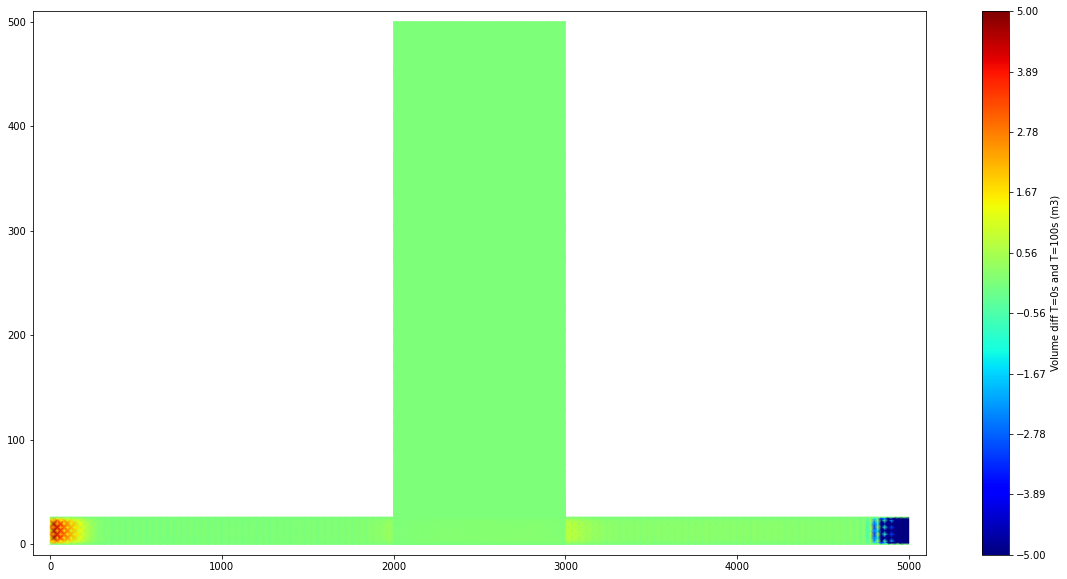

In [5]:
import numpy as np
from mpi4py import MPI

from IPython.display import clear_output
%matplotlib inline

from matplotlib import pyplot as plt
from postel.plot2d import *

# Changing of directory : 'examples' directory of the Telemac sources
import os
HOMETEL = os.environ.get('HOMETEL')
os.chdir(os.path.join(HOMETEL, "examples", "telemac2d", "breach"))

from data_manip.extraction.telemac_file import TelemacFile
from data_manip.computation.volume import volume_calculation

# Instantiation of a Telemac2d object from the test case named 'breach'
# - steering file : 't2d_breach.cas'
# - language : french (1) or english (2: default)
from telapy.api.t2d import Telemac2d

my_mesh_file = "ini_breach.slf"
geo = TelemacFile(my_mesh_file)
ikle = geo.get_mesh_connectivity()
geo.close()

my_case = Telemac2d('t2d_breach.cas', lang=1, comm=MPI.COMM_SELF)

my_case.set_case()

my_case.init_state_default()

npoints = my_case.get('MODEL.NPOIN')

water_depth_0 = my_case.get_array('MODEL.WATERDEPTH')
coord_x = my_case.get_array('MODEL.X')
coord_y = my_case.get_array('MODEL.Y')


#ikle = my_case.get_array('MODEL.IKLE') - 1

volume_w0, surface_point_w0, volume_point_w0 = volume_calculation(ikle,
                                                           water_depth_0,
                                                           coord_x,
                                                           coord_y)

for i in range(101):
    my_case.run_one_time_step()

    
water_depth = my_case.get_array('MODEL.WATERDEPTH')    
volume_w100, surface_point_w100, volume_point_w100 = volume_calculation(ikle,
                                                                        water_depth,
                                                                        coord_x,
                                                                        coord_y)

volume_diff = volume_w100 - volume_w0
volume_point_diff = volume_point_w100 - volume_point_w0
positive_volume_diff = volume_point_diff[volume_point_diff>0].sum()
negative_volume_diff = volume_point_diff[volume_point_diff<0].sum()

print("Volume difference between T = 0 and T = 100 : " + str(volume_diff) + " m3")
print("Positive volume difference between T = 0 and T = 100 : " + str(positive_volume_diff) + " m3")
print("Negative volume difference between T = 0 and T = 100 : " + str(negative_volume_diff) + " m3")

my_case.finalize()
del my_case

my_mesh_file = "ini_breach.slf"
geo = TelemacFile(my_mesh_file)
ikle = geo.get_mesh_connectivity()

# Initialising matplotlib figure
fig, ax = plt.subplots(1, 1, figsize=(20, 10))

# Plotting scalar map
plot2d_scalar_map(fig, ax, geo.tri, volume_point_diff, data_name='Volume diff T=0s and T=100s (m3)', vmin=-5, vmax=5, nv=10)

# Showing the plot
plt.show()

geo.close()